In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
def chi_sq(x, y, err):
    function = lambda x, a, b: a * x + b
    popt, pcov = curve_fit(function, xdata=x, ydata=y, sigma=err)

    sigma_a = np.sqrt(pcov[0, 0])
    sigma_b = np.sqrt(pcov[1, 1])

    return popt[0], popt[1], sigma_a, sigma_b

In [3]:
sns.set_theme()

In [4]:
df = pd.read_excel('11_1.xlsx')

In [5]:
df

,V,Unnamed: 1,T,R,v,Unnamed: 5,t,r,Unnamed: 8,24,комн темп
0,0.31,7.560976,31.560976,0.1829,0.30,7.317073,31.317073,0.2837,NaN,NaN,NaN
1,0.40,9.756098,33.756098,0.1836,0.41,10.000000,34.000000,0.2766,NaN,NaN,NaN
2,0.82,20.000000,44.000000,0.1894,0.80,19.512195,43.512195,0.2308,NaN,NaN,NaN
3,1.20,29.268293,53.268293,0.1957,1.21,29.512195,53.512195,0.1730,NaN,NaN,NaN
4,1.62,39.512195,63.512195,0.2025,1.61,39.268293,63.268293,0.1251,NaN,NaN,NaN
5,2.00,48.780488,72.780488,0.2090,2.03,49.512195,73.512195,0.0820,NaN,NaN,NaN
6,2.42,59.024390,83.024390,0.2155,2.40,58.536585,82.536585,0.0651,NaN,NaN,NaN
7,2.80,68.292683,92.292683,0.2217,2.82,68.780488,92.780488,0.0475,NaN,NaN,NaN
8,3.23,78.780488,102.780488,0.2282,3.20,78.048780,102.048780,0.0360,NaN,NaN,NaN
9,3.60,87.804878,111.804878,0.2344,3.62,88.292683,112.292683,0.0273,NaN,NaN,NaN


In [18]:
T_Cu = df['T']
T_pp = df['t']
R_Cu = df['R'] * 1000
R_pp = df['r'] * 1000
l = 13.4 #mm
d = 0.07 #mm
a = 39.2
b = 4.1
c = 4.1
S_Cu = 2 * 3.14 *(d * 10**(-3)/2)**2
S_pp = b*c

In [35]:
S_Cu

7.693000000000001e-09

In [19]:
sig_Cu = np.ones(12)*l/(np.ones(12)*S_Cu * R_Cu)
sig_pp = np.ones(12)*a/(np.ones(12)*S_pp * R_pp)

Text(0, 0.5, '$\\sigma$,1/Ом мм) ')

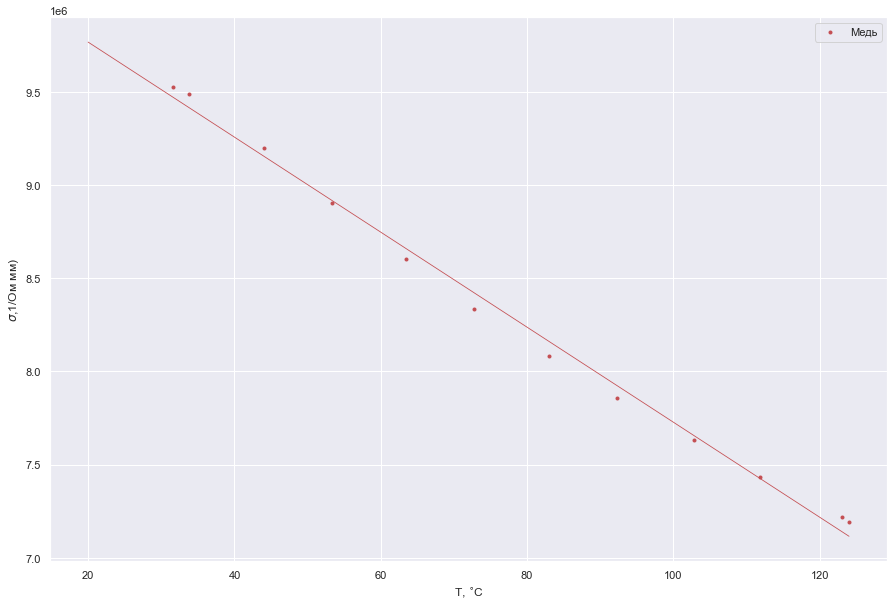

In [22]:
plt.rcParams["figure.figsize"] = (15,10)

plt.scatter(T_Cu, sig_Cu, marker = '.', color = 'r', label = 'Медь')
#plt.scatter(T_pp, sig_pp, marker = '.', color = 'b')
x = np.linspace(20, 124, 500)
a, b, s, e = chi_sq(T_Cu, sig_Cu, None)
y = a * x + b
plt.plot(x, y, lw = 0.8, color = 'r')

plt.legend()
plt.xlabel('T, $^{\circ}$C')
plt.ylabel('$\sigma$,1/Ом мм) ')

In [23]:
a, b, s, e

(-25491.49437754101, 10276060.262321064, 595.4657249778749, 50182.49733409428)

In [44]:
alpha = -a * 7.693000000000001e-09/13.4 *0.1829 * 1000
s_alp = alpha*np.sqrt((s/a)**2 + (0.0001/0.1829)**2 + (0.1/13.4)**2 + (2*0.01/0.07)**2)

In [45]:
alpha, s_alp

(0.0026767014564530425, 0.0007675849442067859)

Text(0, 0.5, '$\\sigma$,1/(Ом мм) ')

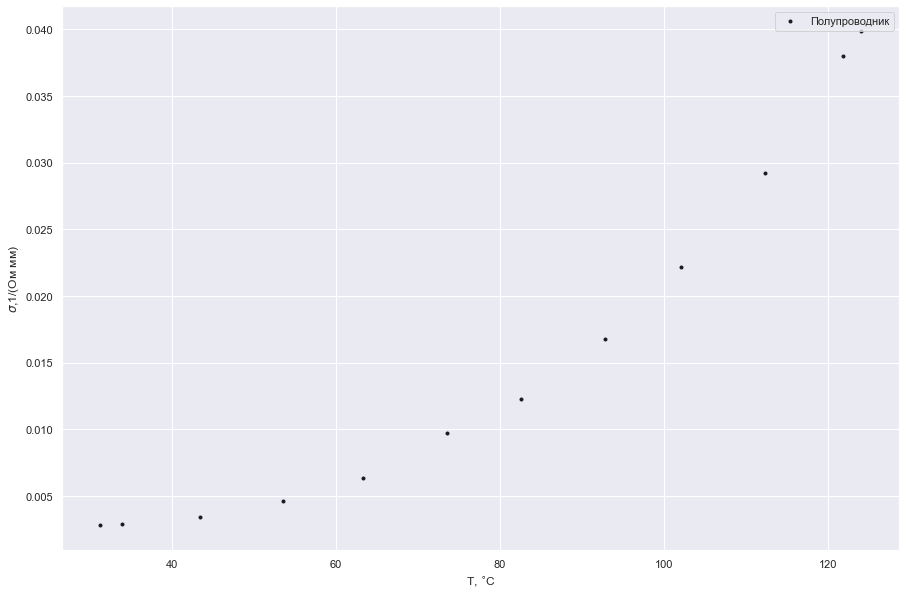

In [25]:
#plt.scatter(T_Cu, sig_Cu, marker = '.', color = 'r')
plt.scatter(T_pp, sig_pp, marker = '.', color = 'k', label = 'Полупроводник')
x_ = np.linspace(30, 124, 500)
a_, b_, s_, e_ = chi_sq(T_pp, sig_pp, None)
y_ = np.exp(x_)
#plt.plot(x_, y_, lw = 0.8, color = 'k')

plt.legend()
plt.xlabel('T, $^{\circ}$C')
plt.ylabel('$\sigma$,1/(Ом мм) ')

Text(0, 0.5, 'ln$\\sigma$')

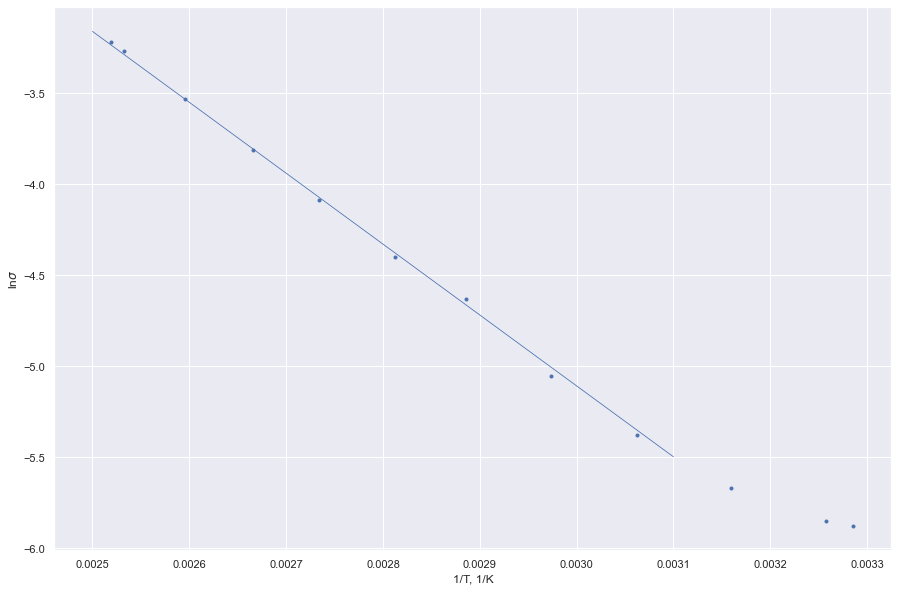

In [26]:
lsig_pp = np.log(sig_pp)
t_pp = 1/(T_pp  + 273)

plt.scatter(t_pp, lsig_pp, marker = '.')
k = np.linspace(0.0025, 0.0031, 100)
aa, bb, ss, ee = chi_sq(t_pp[2::], lsig_pp[2::], None)
l = aa * k + bb
plt.plot(k, l, lw = 0.8)

plt.xlabel('1/T, 1/K')
plt.ylabel('ln$\sigma$')

In [27]:
aa, bb, ss, ee

(-3890.9987633769797,
 6.5656691678249075,
 50.39277414048502,
 0.14121221077100762)

In [46]:
Delta = -2 * 8.617*10**(-5) * aa
sig_D = Delta * ss/aa

In [47]:
Delta, sig_D #eV Ge

(0.6705747268803888, -0.008684690695371188)

In [50]:
-a*0.0175/1000

0.4461011516069677